In [7]:
import numpy as np
import matplotlib.pyplot as plt

# **Creating Synthetic Data**

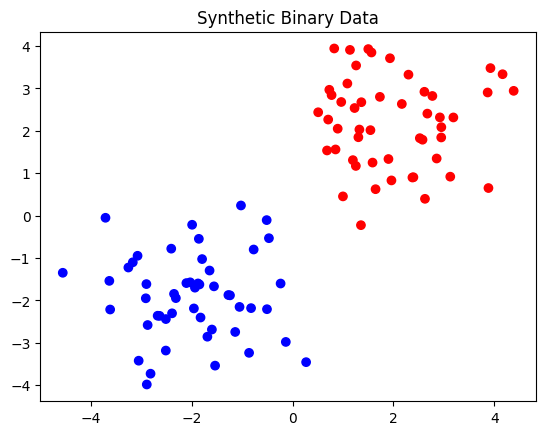

In [8]:
# Random seed for reproducibility
np.random.seed(0)

# Generate class 0 (label 0)
X0 = np.random.randn(50, 2) + np.array([-2, -2])
y0 = np.zeros((50, 1))

# Generate class 1 (label 1)
X1 = np.random.randn(50, 2) + np.array([2, 2])
y1 = np.ones((50, 1))

# Combine the data
X = np.vstack((X0, X1))         # shape: (100, 2)
y = np.vstack((y0, y1))         # shape: (100, 1)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr')
plt.title("Synthetic Binary Data")
plt.show()


In [9]:
print(X)

[[-0.23594765 -1.59984279]
 [-1.02126202  0.2408932 ]
 [-0.13244201 -2.97727788]
 [-1.04991158 -2.15135721]
 [-2.10321885 -1.5894015 ]
 [-1.85595643 -0.54572649]
 [-1.23896227 -1.87832498]
 [-1.55613677 -1.66632567]
 [-0.50592093 -2.20515826]
 [-1.6869323  -2.85409574]
 [-4.55298982 -1.3463814 ]
 [-1.1355638  -2.74216502]
 [ 0.26975462 -3.45436567]
 [-1.95424148 -2.18718385]
 [-0.46722079 -0.53064123]
 [-1.84505257 -1.62183748]
 [-2.88778575 -3.98079647]
 [-2.34791215 -1.84365103]
 [-0.76970932 -0.79762015]
 [-2.38732682 -2.30230275]
 [-3.04855297 -3.42001794]
 [-3.70627019 -0.0492246 ]
 [-2.50965218 -2.4380743 ]
 [-3.25279536 -1.22250964]
 [-3.61389785 -2.21274028]
 [-2.89546656 -1.6130975 ]
 [-2.51080514 -3.18063218]
 [-2.02818223 -1.57166813]
 [-1.93348278 -1.6975281 ]
 [-2.63432209 -2.36274117]
 [-2.67246045 -2.35955316]
 [-2.81314628 -3.7262826 ]
 [-1.82257386 -2.40178094]
 [-3.63019835 -1.53721774]
 [-2.90729836 -1.9480546 ]
 [-1.27090944 -1.87101709]
 [-0.86059932 -3.23482582]
 

In [10]:
print(y)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


# **Sigmoid Function**

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# **Loss Function (Binary Cross-Entropy)**

In [12]:
def compute_loss(y, y_hat):
    # Avoid log(0)
    eps = 1e-8
    return -np.mean(y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps))


# **Model Initialization**

In [13]:
def initialize_weights(n_features):
    W = np.zeros((n_features, 1))
    b = 0
    return W, b


# **Training with Gradient Descent**

In [14]:
def train(X, y, lr=0.1, epochs=1000):
    n_samples, n_features = X.shape
    W, b = initialize_weights(n_features)
    losses = []

    for i in range(epochs):
        # Forward pass
        z = np.dot(X, W) + b
        y_hat = sigmoid(z)

        # Loss
        loss = compute_loss(y, y_hat)
        losses.append(loss)

        # Gradients
        dz = y_hat - y
        dW = np.dot(X.T, dz) / n_samples
        db = np.sum(dz) / n_samples

        # Update weights
        W -= lr * dW
        b -= lr * db

        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {loss:.4f}")

    return W, b, losses


# **Train the Model**

In [15]:
W, b, losses = train(X, y, lr=0.1, epochs=1000)


Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.0326
Epoch 200, Loss: 0.0210
Epoch 300, Loss: 0.0162
Epoch 400, Loss: 0.0135
Epoch 500, Loss: 0.0117
Epoch 600, Loss: 0.0104
Epoch 700, Loss: 0.0093
Epoch 800, Loss: 0.0085
Epoch 900, Loss: 0.0079


# **Plot Loss**

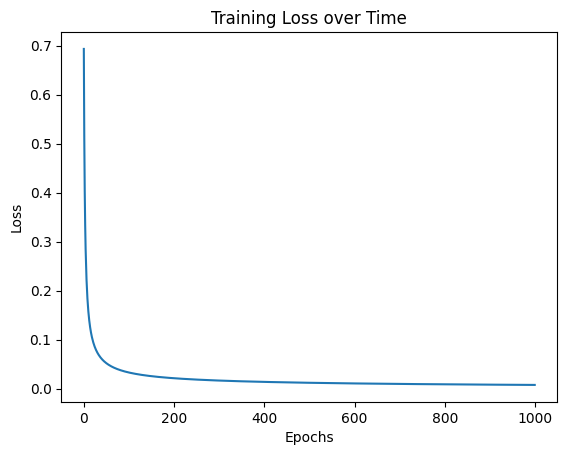

In [16]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss over Time")
plt.show()


# **Prediction & Accuracy**

In [17]:
def predict(X, W, b):
    y_prob = sigmoid(np.dot(X, W) + b)
    return (y_prob >= 0.5).astype(int)

y_pred = predict(X, W, b)
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


# **Plot Decision Boundary**

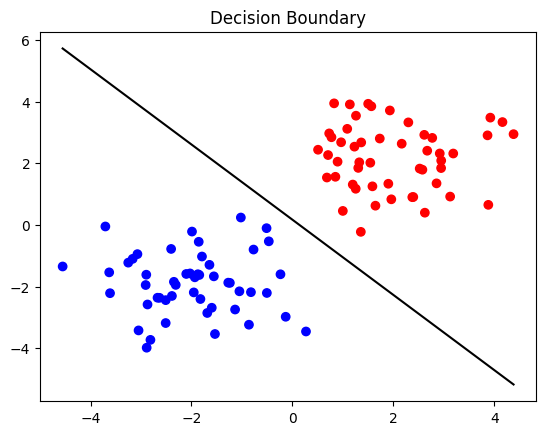

In [39]:
def plot_decision_boundary(X, y, W, b):
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2 = -(W[0] * x1 + b) / W[1]
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr')
    plt.plot(x1, x2, color='black')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, W, b)
